In [4]:
%load_ext autoreload
%autoreload 2

import os, sys, random
path, _ = os.path.split(os.getcwd())
sys.path.append(path)

Explore the idea of having the rewards calculated via a normal distribution. We want to encourage the agent to move the puck toward the opponent's wall. Instead of just rewarding the agent if we scored or not, reward it getting to the back wall and it's distance to the goal.

The goal is to teach the bot to attack and defend better. 

In [9]:
import numpy as np
from environment import AirHockey

In [11]:
env = AirHockey()

In [64]:
_, mu = env.table_midpoints

In [15]:
mu

240

In [71]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [59]:
gaussian(220, mu, 30)

0.8007374029168081

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


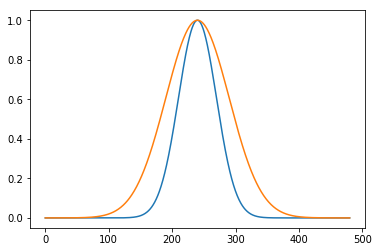

In [80]:
x_values = np.linspace(0, 480, 1000)
for sig in [30, 50]:
    plt.plot(x_values, gaussian(x_values, mu, sig))

plt.show()

It seems that the best sigma's are 30 and 50.